# Signal Processing 

## 1. Load libraries

In [1]:
# Core 
import io

# Data Science
import numpy as np
import scipy 
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from hypyp.ext.mpl3d import glm
from hypyp.ext.mpl3d.mesh import Mesh
from hypyp.ext.mpl3d.camera import Camera

# MNE 
import mne

# HyPyP
from hypyp import prep 
from hypyp import analyses
from hypyp import stats
from hypyp import viz

# From Mother-InfantEEG_complete notebook
import os
from copy import copy
from collections import OrderedDict
from mne.datasets import eegbci
from mne import Epochs, pick_types, find_events, pick_types, set_eeg_reference

# other
from copy import copy
import re 
import rise

## 3. Load Raw Data
TO DO: create a loop for all participants

In [2]:
myPath = "/home/agata/Desktop/thesis/dyad_data/"
data = os.listdir(myPath)
data.sort()

for dyad in data:
    print(dyad)   

Dyad01_RestingState1.bdf
Dyad02_restingstate1.bdf


In [3]:
# Function to read the raw data from .bdf and .fif files
def read_data(path):
    if path[-4:] == ".bdf":
        data = mne.io.read_raw_bdf(path, preload = True)
        return data
    elif path[-4:] == ".fif":
        data = mne.io.read_raw_fif(path, preload = True)
        return data
    
# Split the dyad file into separate mother and infant files

# Identify the channels corresponding to each person
def identify_person(dyad_data):
    r_i = re.compile("^1-")
    r_m = re.compile("^2-")
    infant_channels = [chan for chan in list(filter(r_i.match, dyad_data.info["ch_names"])) if "EMPTY" not in chan]
    mother_channels = [chan for chan in list(filter(r_m.match, dyad_data.info["ch_names"])) if "EMPTY" not in chan]

    return infant_channels, mother_channels


# Create and save mother and infant data in two separate files
def separate_files(dyad_path, i_channels, m_channels):
    dyad_data = read_data(dyad_path)
    idx = re.findall(r'\d+', str(dyad_path))[0]
    infant_path = f"Infant{idx}_RestingState.fif"
    mother_path = f"Mother{idx}_RestingState.fif"
    infant_file = dyad_data.save(infant_path, i_channels, overwrite = True)
    mother_file = dyad_data.save(mother_path, m_channels, overwrite = True)
    return infant_file, mother_file, infant_path, mother_path


# Rename channels: delete empty electrodes and remove 1- and 2- from channel names
def rename_channel_names(data):
    old_channels = list(filter(lambda x: "EMPTY" not in x, data.info["ch_names"]))
    new_channels = [chan[2::] if chan[0:2] == "1-" or chan[0:2] == "2-" else chan for chan in old_channels]
    old_to_new_names = {}
    for old, new in zip(old_channels, new_channels):
        old_to_new_names[old] = new


    data.rename_channels(mapping = old_to_new_names)
    
    return data


# Combine functions splitting the file and renaming the channels 

def main(dyad_path):
    dyad_data = read_data(dyad_path)
    infant_channels, mother_channels = identify_person(dyad_data)
    infant_file, mother_file, infant_path, mother_path = separate_files(dyad_path, infant_channels, mother_channels)
    infant_data = read_data(infant_path)
    mother_data = read_data(mother_path)
    rename_channel_names(infant_data)
    rename_channel_names(mother_data)
    return infant_file, mother_file, dyad_data, infant_data, mother_data


# The result includes separate mother and infant files, dyad data, and raw mother and infant files
infant_file, mother_file, dyad_data, rawInfant, rawMom = main(os.path.join(myPath, data[1]))

Extracting EDF parameters from /home/agata/Desktop/thesis/dyad_data/Dyad02_restingstate1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 430079  =      0.000 ...   210.000 secs...


/tmp/ipykernel_61197/3882218786.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'1-EMPTY', '2-EMPTY'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_bdf(path, preload = True)


Extracting EDF parameters from /home/agata/Desktop/thesis/dyad_data/Dyad02_restingstate1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 430079  =      0.000 ...   210.000 secs...


/tmp/ipykernel_61197/3882218786.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'1-EMPTY', '2-EMPTY'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_bdf(path, preload = True)


Overwriting existing file.
Writing /home/agata/Desktop/thesis/Infant02_RestingState.fif


/tmp/ipykernel_61197/3882218786.py:28: RuntimeWarning: This filename (/home/agata/Desktop/thesis/Infant02_RestingState.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  infant_file = dyad_data.save(infant_path, i_channels, overwrite = True)


Closing /home/agata/Desktop/thesis/Infant02_RestingState.fif
[done]
Overwriting existing file.
Writing /home/agata/Desktop/thesis/Mother02_RestingState.fif


/tmp/ipykernel_61197/3882218786.py:29: RuntimeWarning: This filename (/home/agata/Desktop/thesis/Mother02_RestingState.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mother_file = dyad_data.save(mother_path, m_channels, overwrite = True)


Closing /home/agata/Desktop/thesis/Mother02_RestingState.fif
[done]
Opening raw data file Infant02_RestingState.fif...
Isotrak not found
    Range : 0 ... 430079 =      0.000 ...   210.000 secs
Ready.
Reading 0 ... 430079  =      0.000 ...   210.000 secs...


/tmp/ipykernel_61197/3882218786.py:7: RuntimeWarning: This filename (Infant02_RestingState.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(path, preload = True)


Opening raw data file Mother02_RestingState.fif...
Isotrak not found
    Range : 0 ... 430079 =      0.000 ...   210.000 secs
Ready.
Reading 0 ... 430079  =      0.000 ...   210.000 secs...


/tmp/ipykernel_61197/3882218786.py:7: RuntimeWarning: This filename (Mother02_RestingState.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(path, preload = True)


### Check the data

In [4]:
rawInfant.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 75 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-04-23 12:15:23 UTC
 meas_id: 4 items (dict)
 nchan: 75
 projs: []
 sfreq: 2048.0 Hz
>

In [5]:
rawMom.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 75 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-04-23 12:15:23 UTC
 meas_id: 4 items (dict)
 nchan: 75
 projs: []
 sfreq: 2048.0 Hz
>

## 3. Set parameters
Define the frequency bands of interest and the sampling rate<br><br>
Passbands for the adult data: 1. theta [4–7 Hz] 2) alpha [8–12 Hz] 3) beta [13–30 Hz] 4) gamma [31–48 Hz].<br><br> 
Because of the differences in frequency bands between adult and infant data, the following settings are used for the infant data: 1) theta [3–5 Hz] 2) alpha [6–9 Hz] and 3) beta [13–30 Hz] 4) gamma [31–48 Hz]. <br><br>
Source: https://www.sciencedirect.com/science/article/pii/S1878929322000482

In [6]:
freq_bands = {'Theta-Baby': [3, 5], 
              'Theta-Mom': [4, 7],
              'Alpha-Baby': [6, 9], 
              'Alpha-Mom': [8, 12]} 
              
full_freq = { 'full_frq': [3, 12]}

# Keep the order of frequency bands in the dictionary
freq_bands = OrderedDict(freq_bands)

sampling_rate = rawInfant.info['sfreq'] # 2048 Hz 

# load BioSemi64 montage
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')

# get the channel names 
channel_names = biosemi64_montage.ch_names

# Drop reference channels 'M1', 'M2' and heartrate channels 'HR1', 'HR2'
# Probably not needed when the data is actually preprocessed

to_remove_infant = []
for ch in rawInfant.info["ch_names"]:
    if ch not in channel_names:
        to_remove_infant.append(ch)
rawInfant.drop_channels(to_remove_infant)

to_remove_mom = []
for ch in rawMom.info["ch_names"]:
    if ch not in channel_names:
        to_remove_mom.append(ch)
rawMom.drop_channels(to_remove_mom)


# Set montage 
rawInfant.set_montage('biosemi64') 
rawMom.set_montage('biosemi64') 

<Raw | Mother02_RestingState.fif, 64 x 430080 (210.0 s), ~210.1 MB, data loaded>

## 4. Epoch the data
Divide continuous data into fixed length epochs. Fixed lengths epochs are suitable for many types of analysis, including frequency or time-frequency analyses, connectivity analyses, or classification analyses.<br><br>
The data from our epochs object has shape (n_epochs, n_sensors, n_times)<br><br>
Resources: https://mne.tools/dev/auto_tutorials/epochs/60_make_fixed_length_epochs.html

In the final dataset, the data will be epoched based on 5 triggers which correspond to 5 phases: free play, still face 1, free play, still face 2, reunion

In [7]:
# We add events to the data, duration of each event is 2.0 seconds
rawEpochsInfant = mne.make_fixed_length_epochs(rawInfant, duration=2.0, preload=True, reject_by_annotation=False)
rawEpochsMom = mne.make_fixed_length_epochs(rawMom, duration=2.0, preload=True, reject_by_annotation=False)

# Picking the preprocessed epochs for each participant
preproc_S1 = rawEpochsInfant
preproc_S2 = rawEpochsMom

Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 105 events and 4096 original time points ...
0 bad epochs dropped
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 105 events and 4096 original time points ...
0 bad epochs dropped


### Downsample the data to avoid kernel crashing

In [8]:
# # Downsample the data to reduce the computation time. Using a 512 Hz rate or higher should be enough 
# # for most high frequency analyses (Turk et al., 2022)
print('Original sampling rate:', preproc_S1.info['sfreq'], 'Hz')
preproc_S1.resample(250)
preproc_S2.resample(250)
print('New sampling rate:', preproc_S1.info['sfreq'], 'Hz')

Original sampling rate: 2048.0 Hz
New sampling rate: 250.0 Hz


## 5. Time-frequency Analysis - Hilbert Transform

In [9]:
data_inter = np.array([preproc_S1, preproc_S2])
result_intra = []

In [10]:
# Computes analytic signal per frequency band using FIR filtering and Hilbert transform.
# Returns: complex_signal: array, shape is
# (2, n_epochs, n_channels, n_freq_bands, n_times)
complex_signal = analyses.compute_freq_bands(data = data_inter, sampling_rate = preproc_S1.info['sfreq'], freq_bands = freq_bands)

## 6. PLV

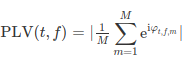<br><br>
where M is the trial number, i is the imaginary unit, φt, f ,m is the phase angle on trial m at certain time‐frequency point (t, f).<br><br>
PLV ranges over [0, 1] and indicates the distribution range of the phase difference series over [0, 2π). Larger PLV implies higher connectivity.

In [11]:
# if mode.lower() == 'plv':<br>
#         phase = complex_signal / np.abs(complex_signal)<br>
#         c = np.real(phase)<br>
#         s = np.imag(phase)<br>
#         dphi = _multiply_conjugate(c, s, transpose_axes=transpose_axes)<br>
#         con = abs(dphi) / n_samp
# Returns (n_freq, 2*n_channels, 2*n_channels)
# To extract inter-brain connectivity values, slice the last two dimensions of con with [0:n_channels, n_channels: 2*n_channels]
# epoch_average = True: average connectivity over epochs = overall level of connectivity between two brain regions over a period of time
result = analyses.compute_sync(complex_signal, mode="plv")

In [12]:
# The diagonal elements of the matrix correspond to the PLV of each channel with itself and are always equal to 1
# Let's remove them 
result_clean = result.copy()
for i in range(4):
    result_clean[i] -= np.diag(np.diag(result_clean[i]))

In [13]:
print(result_clean.shape[0])

4


In [14]:
# Mean PLV per each frequency band 
print(f"Mean theta baby: {np.mean(result_clean[0])}")
print(f"Mean theta mom: {np.mean(result_clean[1])}")
print(f"Mean alpha baby: {np.mean(result_clean[2])}")
print(f"Mean alpha mom: {np.mean(result_clean[3])}")

Mean theta baby: 0.37523962205648986
Mean theta mom: 0.3628320667025774
Mean alpha baby: 0.3624993540186973
Mean alpha mom: 0.343096132907419


Slicing results to get the Inter-brain part of the matrix

In [15]:
n_ch = len(rawInfant.info["ch_names"])
theta_baby, theta_mom, alpha_baby, alpha_mom = result[:, 0:n_ch, n_ch:2*n_ch]

# choosing Alpha_Low for further analyses for example
values = theta_baby
values -= np.diag(np.diag(values))

# computing Cohens'D for further analyses for example
C = (values - np.mean(values[:])) / np.std(values[:])

Slicing results to get the Intra-brain part of the matrix

In [16]:
# slicing results to get the Intra-brain part of the matrix
for i in [0, 1]:
    theta_baby, theta_mom, alpha_baby, alpha_mom = result[:, (
        i * n_ch):((i + 1) * n_ch), (i * n_ch): ((i + 1) * n_ch)]
    # choosing Alpha_Low for further analyses for example
    values_intra = theta_baby
    values_intra -= np.diag(np.diag(values_intra))
    # computing Cohens'D for further analyses for example
    C_intra = (values_intra - np.mean(values_intra[:])) / np.std(values_intra[:])
    # can also sample CSD values directly for statistical analyses
    result_intra.append(C_intra)

## 7. Visualizations

### Inter-brain connectivity

Theta Baby

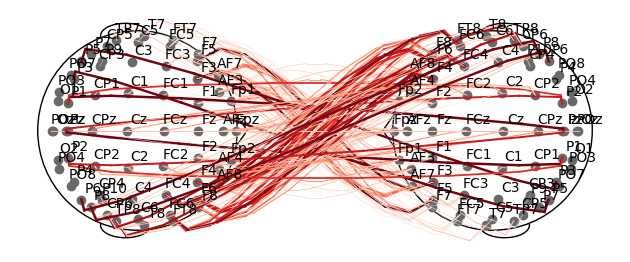

<AxesSubplot: >

In [17]:
# Inter-brain VAR-based connectivity
# Information flow from participant 1 to participant 2
# plotting links according to sign (red for positive values,
# blue for negative) and value (line thickness increases
# with the strength of connectivity)
inter_brain_viz = viz.viz_2D_topomap_inter(preproc_S1, preproc_S2, result_clean[0], threshold = 0.8, steps=10, lab=True)
inter_brain_viz


Theta Mom

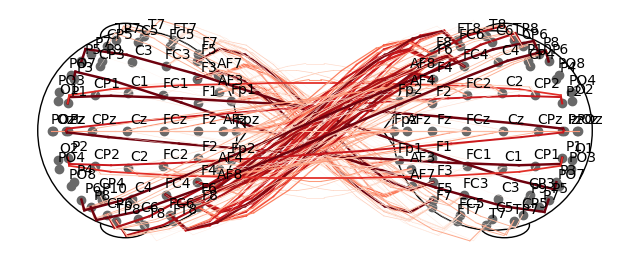

<AxesSubplot: >

In [18]:
inter_brain_viz = viz.viz_2D_topomap_inter(preproc_S1, preproc_S2, result_clean[1], threshold = 0.8, steps=10, lab=True)
inter_brain_viz

Alpha Baby

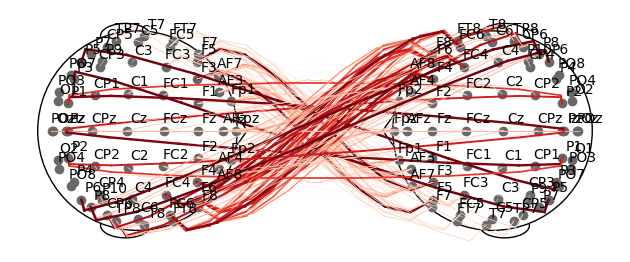

<AxesSubplot: >

In [19]:
inter_brain_viz = viz.viz_2D_topomap_inter(preproc_S1, preproc_S2, result_clean[2], threshold = 0.8, steps=10, lab=True)
inter_brain_viz

Alpha Mom

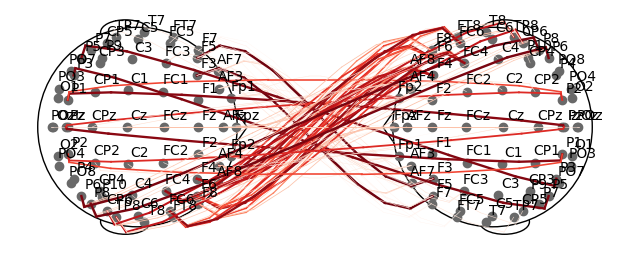

<AxesSubplot: >

In [20]:
inter_brain_viz = viz.viz_2D_topomap_inter(preproc_S1, preproc_S2, result_clean[3], threshold = 0.8, steps=10, lab=True)
inter_brain_viz

### Intra-brain connectivity

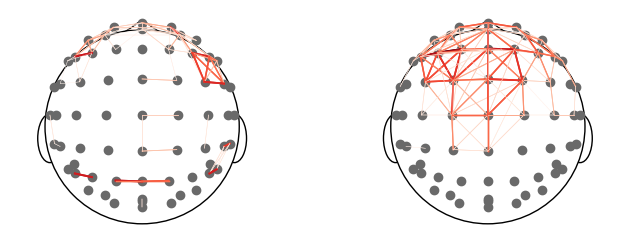

<AxesSubplot: >

In [21]:
viz.viz_2D_topomap_intra(preproc_S1, preproc_S2,
                         C1= result_intra[0],
                         C2= result_intra[1],
                         threshold='auto',
                         steps=2,
                         lab=False)